In [1]:
#Installing Dependancies
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Obtain the data
train = pd.read_csv("/home/ken/Documents/0_train.csv")
test = pd.read_csv("/home/ken/Documents/0_test.csv")

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
#Combine the training and test data
train['Source']='train'
test['Source']='test'
data = pd.concat([train,test], ignore_index=True, sort =True)
print (train.shape, test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


In [6]:
#Check for missing values
data.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Source                             0
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [7]:
data.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [8]:
#Fill missing values in product categories
data[['Product_Category_2','Product_Category_3']] = data[['Product_Category_2','Product_Category_3']].fillna(value=0)

In [9]:
data.apply(lambda x: x.isnull().sum())

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Product_ID                         0
Purchase                      233599
Source                             0
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [10]:
# checking dependency of gender on purchase

x = data[['Gender', 'Purchase']].groupby('Gender').mean()
x = pd.DataFrame(x)
x

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [11]:
# checing the dependency of age attribute with purchasing power

y = data[['Age', 'Purchase']].groupby('Age').mean()
y = pd.DataFrame(y)
y

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


In [12]:
# checking the dependency of cities where custoer live with the purchasing power

data[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


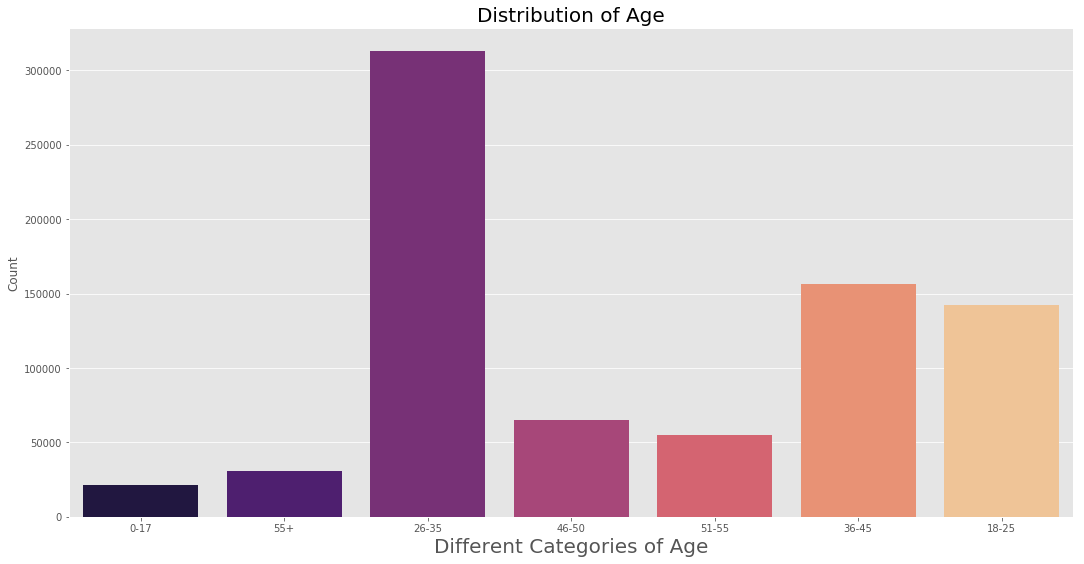

In [13]:
# visualizing the age of customers

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')

sns.countplot(data['Age'], palette = 'magma')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Different Categories of Age', fontsize = 20)
plt.ylabel('Count')
plt.show()

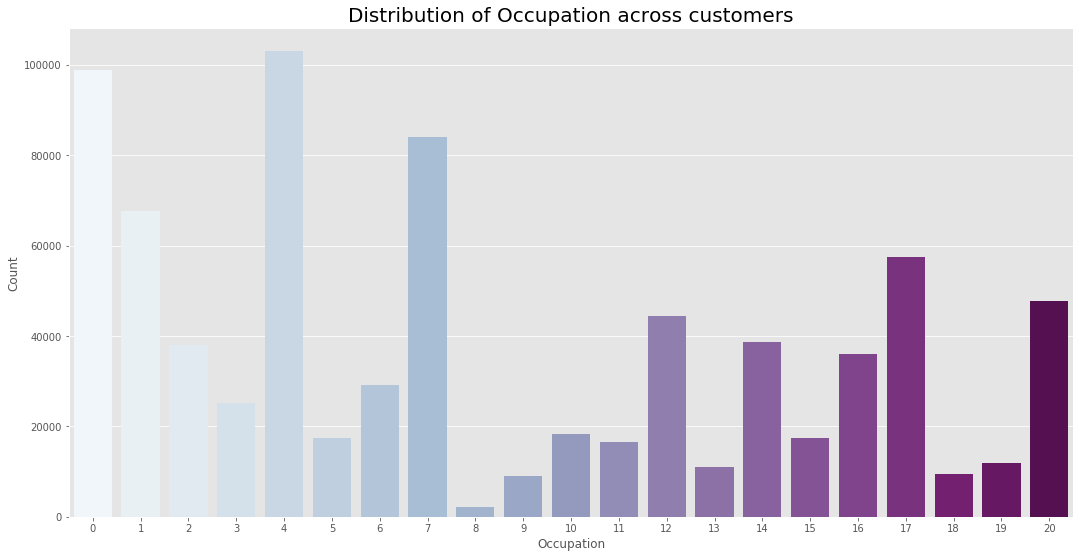

In [14]:
# visualizing the occupation of customers

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')

sns.countplot(data['Occupation'], palette = 'BuPu')
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

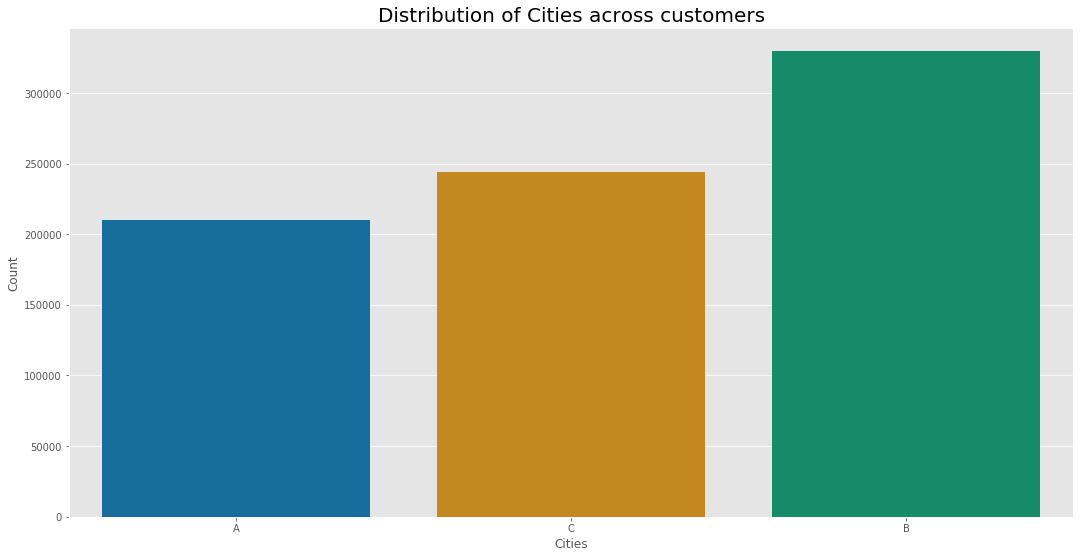

In [15]:
# visulaizing the cities the customers are from

sns.countplot(data['City_Category'], palette = 'colorblind')
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

In [16]:
data.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
data.Stay_In_Current_City_Years.replace('4+','4',inplace = True)
data.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [18]:
#Perform label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['City_Category','Gender','Age']

for i in var:
    data[i] = le.fit_transform(data[i])

In [19]:
#Removing unwanted columns

#Saving the User_ID and Product_ID before deleting
User_ID = data['User_ID']
Product_ID = data['Product_ID']

data = data.drop(['User_ID','Product_ID'], axis =1)

data.shape

(783667, 11)

In [20]:
#Divide into train and test
train = data.loc[data['Source'] == "train"]
test = data.loc[data['Source'] =="test"]

#Drop unneccesary columns
train.drop(['Source'], axis =1, inplace =True)
test.drop(['Source'], axis =1, inplace =True)

print ('Shape of train set', train.shape, list(train.columns))
print ('Shape of test set', test.shape, list(test.columns))

Shape of train set (550068, 10) ['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase', 'Stay_In_Current_City_Years']
Shape of test set (233599, 10) ['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase', 'Stay_In_Current_City_Years']


/home/ken/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
train.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years
0,0,0,0,0,10,3,0.0,0.0,8370.0,2
1,0,0,0,0,10,1,6.0,14.0,15200.0,2
2,0,0,0,0,10,12,0.0,0.0,1422.0,2
3,0,0,0,0,10,12,14.0,0.0,1057.0,2
4,6,2,1,0,16,8,0.0,0.0,7969.0,4


In [22]:
test.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years
550068,4,1,1,1,7,1,11.0,0.0,NaN,2
550069,2,2,1,0,17,3,5.0,0.0,NaN,0
550070,3,1,0,1,1,5,14.0,0.0,NaN,4
550071,3,1,0,1,1,4,9.0,0.0,NaN,4
550072,2,2,0,0,1,4,5.0,12.0,NaN,1


In [23]:
#Splitting the data into dependant and independent sets
y_train = train['Purchase']

#Removing the purchase column from the data set
train = train.drop(['Purchase'], axis =1)
X_train = train

print ('Shape of X_train:', X_train.shape)
print ('Shape of y_train:', y_train.shape)

Shape of X_train: (550068, 9)
Shape of y_train: (550068,)


In [24]:
#Assessing the test set
test.head()
X_test = test.drop(['Purchase'], axis =1)
print ('Shape of test set',X_test.shape)

Shape of test set (233599, 9)


In [25]:
#Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

/home/ken/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ken/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ken/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ken/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
X_train

array([[-1.84424754, -1.37151602, -1.74651251, ..., -1.08365403,
        -0.61464112,  0.10980142],
       [-1.84424754, -1.37151602, -1.74651251, ..., -0.11832323,
         1.62510562,  0.10980142],
       [-1.84424754, -1.37151602, -1.74651251, ..., -1.08365403,
        -0.61464112,  0.10980142],
       ...,
       [-0.36673935, -0.05609001, -1.74651251, ..., -1.08365403,
        -0.61464112,  1.66086068],
       [ 2.58827703,  1.25933601, -1.74651251, ..., -1.08365403,
        -0.61464112,  0.10980142],
       [ 1.11076884, -0.05609001, -1.74651251, ..., -1.08365403,
        -0.61464112,  1.66086068]])

In [27]:
y_train

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
5         15227.0
6         19215.0
7         15854.0
8         15686.0
9          7871.0
10         5254.0
11         3957.0
12         6073.0
13        15665.0
14         5378.0
15         2079.0
16        13055.0
17         8851.0
18        11788.0
19        19614.0
20         8584.0
21         9872.0
22         9743.0
23         5982.0
24        11927.0
25        16662.0
26         5887.0
27         6973.0
28         5391.0
29        16352.0
           ...   
550038      596.0
550039      595.0
550040       26.0
550041      488.0
550042      243.0
550043       48.0
550044       62.0
550045      252.0
550046      236.0
550047      244.0
550048      591.0
550049      473.0
550050      368.0
550051      489.0
550052      239.0
550053      371.0
550054       60.0
550055      238.0
550056      254.0
550057       61.0
550058      121.0
550059       48.0
550060      494.0
550061      599.0
550062    

In [28]:
#Ridge Regression
#predictive analytics
#regression analysis
#Linear Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from math import *

ridge = Ridge()
ridge.fit(X_train, y_train)

#Prediction on training set
y_pred = ridge.predict(X_train)

# finding the mean_squared error
mse = mean_squared_error(y_train, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_train, y_pred)
print("R2 Score:", r2)

#Measure accuracy between the train set predictions and actual values
cv_score = cross_val_score(ridge, y_pred.reshape(-1,1), y_train.values.reshape(-1,1), cv=10)
print ("Ridge Regression Model Accuracy: %0.2f (+/-%0.2f)" % (cv_score.mean(), cv_score.std() * 2))

RMSE Error: 4625.0444522316875
R2 Score: 0.15219700274659564
Ridge Regression Model Accuracy: 0.15 (+/-0.08)


In [29]:
# Lasso Regression
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_train)


# finding the mean_squared error
mse = mean_squared_error(y_train, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_train, y_pred)
print("R2 Score:", r2)

#Measure accuracy between the train set predictions and actual values
cv_score = cross_val_score(lasso, y_pred.reshape(-1,1), y_train.values.reshape(-1,1), cv=10)
print ("Lasso Regression Model Accuracy: %0.2f (+/-%0.2f)" % (cv_score.mean(), cv_score.std() * 2))

RMSE Error: 4625.045334569841
R2 Score: 0.15219667926905533
Lasso Regression Model Accuracy: 0.15 (+/-0.08)


In [31]:
#Elastic Net
#predictive analytics
#regression analysis
#Linear Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

elastic= ElasticNet()
elastic.fit(X_train, y_train)

y_pred = elastic.predict(X_train)


# finding the mean_squared error
mse = mean_squared_error(y_train, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_train, y_pred)
print("R2 Score:", r2)

#Measure accuracy between the train set predictions and actual values
cv_score = cross_val_score(elastic, y_pred.reshape(-1,1), y_train.values.reshape(-1,1), cv=10)
print ("ElasticNet Model Accuracy: %0.2f (+/-%0.2f)" % (cv_score.mean(), cv_score.std() * 2))

RMSE Error: 4654.872229098891
R2 Score: 0.14122646066153233
ElasticNet Model Accuracy: 0.15 (+/-0.08)


In [33]:
# GradientBoost Regressor
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_train)


# finding the mean_squared error
mse = mean_squared_error(y_train, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_train, y_pred)
print("R2 Score:", r2)

#Measure accuracy between the train set predictions and actual values
cv_score = cross_val_score(gbr, y_pred.reshape(-1,1), y_train.values.reshape(-1,1), cv=10)
print ("GradientBoosting Regressor Model Accuracy: %0.2f (+/-%0.2f)" % (cv_score.mean(), cv_score.std() * 2))

RMSE Error: 2918.826250419529
R2 Score: 0.6623400031604791


/home/ken/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ken/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ken/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ken/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

GradientBoosting Regressor Model Accuracy: 0.66 (+/-0.04)


In [35]:
#Decision Tree
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

y_pred =tree_reg.predict(X_train)

# finding the mean_squared error
mse = mean_squared_error(y_train, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_train, y_pred)
print("R2 Score:", r2)

cv_score = cross_val_score(tree_reg, y_pred.reshape(-1,1), y_train.values.reshape(-1,1), cv=10)
#cv_score
print("DecisionTree Regressor Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

RMSE Error: 3752.413079381889
R2 Score: 0.44193548635147195
DecisionTree Regressor Accuracy: 0.44 (+/- 0.02)


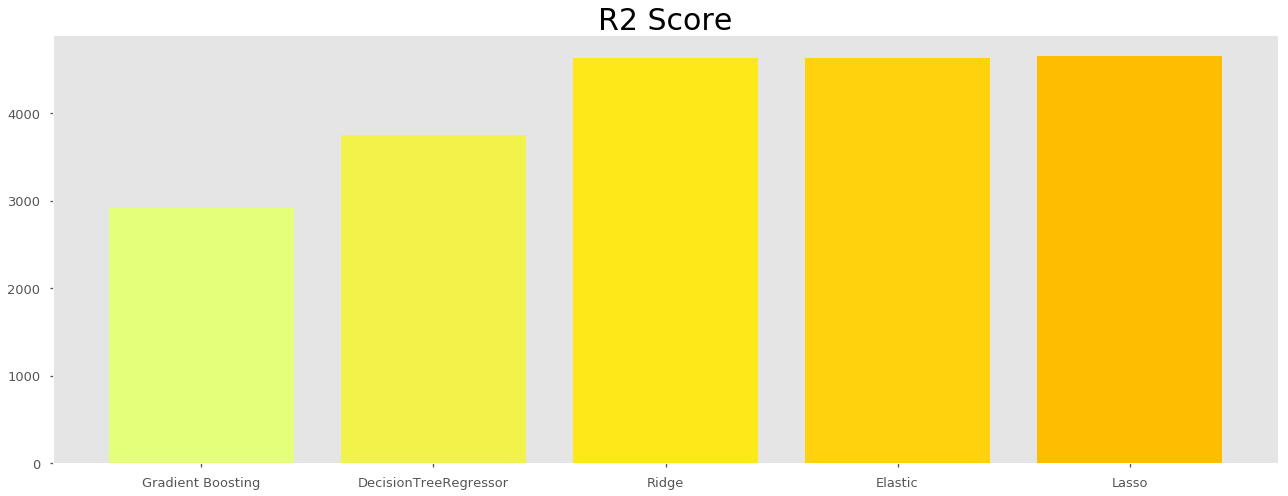

In [38]:
#Comparison of rmse error
rmse_error = np.array([4625, 4625, 4654, 2918, 3752])
labels = np.array(['Ridge', 'Elastic', 'Lasso', 'Gradient Boosting','DecisionTreeRegressor'])
indices = np.argsort(rmse_error)
color = plt.cm.Wistia(np.linspace(0, 1, 9))

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), rmse_error[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

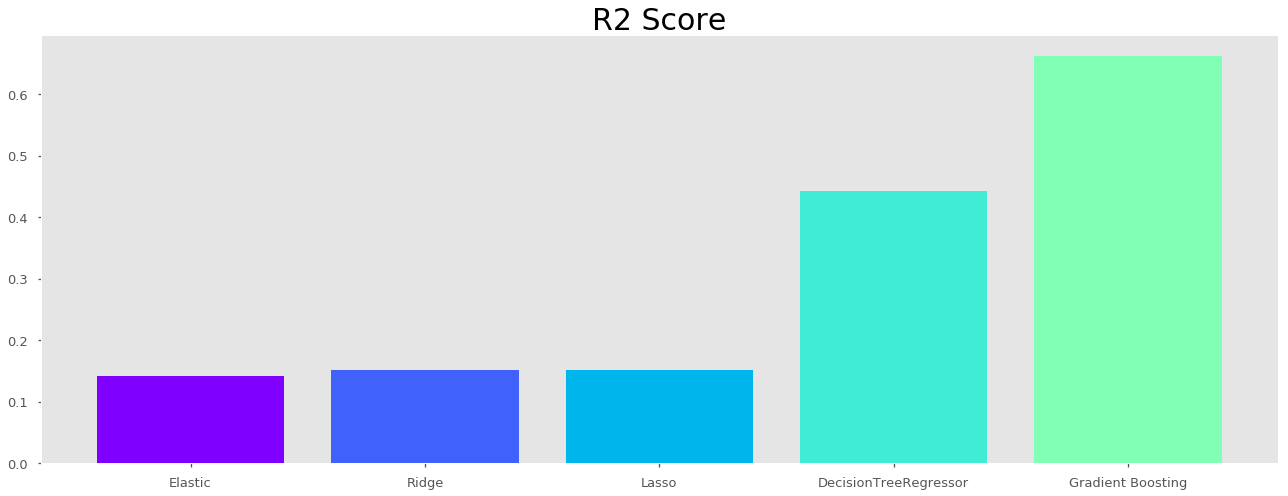

In [39]:
#Comparison of R2 score
r2_score = np.array([0.152, 0.1412, 0.152, 0.6623, 0.4419])
labels = np.array(['Ridge', 'Elastic', 'Lasso', 'Gradient Boosting','DecisionTreeRegressor'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()